In [10]:
import cv2 as cv
import math
import numpy as np
from matplotlib import pyplot as plt

### Gaussian Kernel Generation

for explanation on how this works please look at _GaussianFilter.ipynb_

In [11]:
def CreateGaussianKernel(size, sigma):

    def Gauss1D(x, s):
        upperex = - ( math.pow(x, 2) / ( 2 * math.pow(s, 2) ) )
        upperside = math.pow( math.e, upperex )
        lowerside = math.sqrt(2 * math.pi) * s
        return (upperside / lowerside)
    
    k = []
  
    halfsize = int(size / 2)

    for i in range( -halfsize, (halfsize + 1) ):
        k.append( Gauss1D(i, sigma) )

    Matrix1DGauss = np.matrix(k)

    return np.dot(
        Matrix1DGauss.T,
        Matrix1DGauss 
    )


### Pyramid Interpolate Down

Scale the image into half the size then pass a gaussian filter (11x11, sigma = 0.8)

In [12]:
def PyrInterpolateDown(image):
    (hs, ws, ds) = image.shape

    (h, w) = ( int(hs / 2), int(ws / 2) )

    #Nearest beacuse of the simplest metode
    resized = cv.resize(
        image, 
        (w, h), 
        interpolation = cv.INTER_NEAREST 
    )

    kernel = CreateGaussianKernel(11, 0.8)
    filterd = cv.filter2D(resized, -1, kernel) 

    return filterd


### Pyramid Generation Function

In [29]:
def CreatePyramid(image, depth):
    
    if depth < 2 :
        Exception("depth need to be more than 1")

    (hsx, wsx, dsx) = image.shape

    #Create a image / numpy aray with the same hight and depth, but 2x width
    Pyramid = np.zeros( (
        (hsx),
        (wsx * 2),
        (dsx)
    ), dtype=np.uint8 )

    #list beacuse i dont know how to pass by refrence for ints
    offsett = [0]

    def addtoPyramid(imgxz, ofx, Pyramid):
        ih, iw, _ = imgxz.shape
        
        offt = ofx[0]
        
        #places the image on the array slice
        Pyramid[
                hsx - ih : hsx,
                offt : offt + iw
        ] = imgxz

        #add the offset by the image size
        ofx[0] += iw 

    #add the first image
    addtoPyramid(image, offsett, Pyramid)

    for i in range( depth ):
        image = PyrInterpolateDown(image)
        addtoPyramid(image, offsett, Pyramid)
    
    return Pyramid

### test with image

In [30]:
def showimg(image, title = ""):
    plt.imshow(image)
    plt.axis("off")
    plt.title(title)
    plt.show()

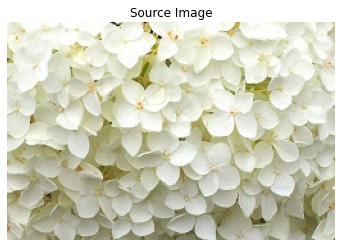

In [31]:
image_source = cv.imread('FlowerPatch.jpg', cv.IMREAD_COLOR)
image_source = cv.cvtColor(image_source, cv.COLOR_BGR2RGB)
showimg(image_source, "Source Image")

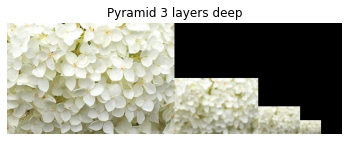

In [32]:
pyramid3 = CreatePyramid(image_source, 3)

showimg(pyramid3, "Pyramid 3 layers deep")